### Regression Analysis
- data : boston house price <- sklearn dataset
- loading : use fetch_california_housing function

#### [1] Prepare Data

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_california_housing

In [192]:
# load data
bostonDF = pd.read_csv('boston.csv')

In [193]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [194]:
# Check data
bostonDF.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [195]:
# correlation coefficient
sel = abs(bostonDF.corr().medv)
sel

crim       0.388305
zn         0.360445
indus      0.483725
chas       0.175260
nox        0.427321
rm         0.695360
age        0.376955
dis        0.249929
rad        0.381626
tax        0.468536
ptratio    0.507787
b          0.333461
lstat      0.737663
medv       1.000000
Name: medv, dtype: float64

In [196]:
sel.sort_values(ascending = False)

medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
nox        0.427321
crim       0.388305
rad        0.381626
age        0.376955
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
Name: medv, dtype: float64

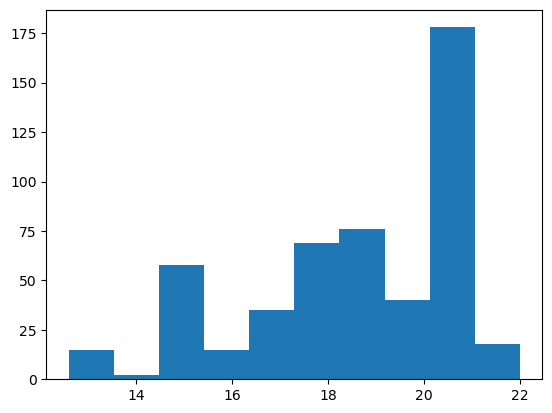

In [197]:
# check normal distribution
# Bad!!!
plt.hist(bostonDF.ptratio)
plt.show()

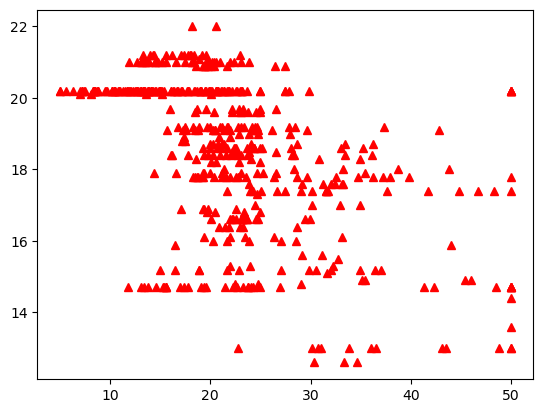

In [198]:
# linear relation
# target : house price
# independent : lstat, rm, ptratio
plt.plot(bostonDF.medv, bostonDF.ptratio, 'r^')
plt.show()

#### [2] Learning method & Data preprocessing
- data preprocessing : missing value, outlier, duplication, contradiction value(모순값)
- data convertion : numeric -> category, numeric -> Scale (Normalization)


In [199]:
# [2-1] check missing value
bostonDF.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [200]:
# [2-2] check contradiction value or noise data : different from other data
# for col in bostonDF.columns:
#     print(f'-- [{col}] --------------')
#     print(bostonDF[col].unique())

#### [3] Prepare train data & test data

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
# split the data feature and target
data = bostonDF.iloc[:, :-1]
target = bostonDF.medv

In [203]:
# split to train, test data => 75% : 25%
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 156)

In [204]:
len(X_train), len(y_train), len(X_test), len(y_test)

(379, 379, 127, 127)

#### [4] training
- create training model object
- training <- train data
- model evaluation <-compare predict and answer

[4-1] create training model object

In [205]:
from sklearn.linear_model import LinearRegression

In [206]:
model = LinearRegression()

[4-2] training with X_train, y_train

In [207]:
model.fit(X_train, y_train)

LinearRegression()

In [208]:
## correlation, intercept => house price = crime*coef_1 + ... + lower*coef_13 + intercepter_
model.coef_, model.intercept_

(array([-1.11303280e-01,  6.42165144e-02,  5.78708278e-02,  2.71935030e+00,
        -2.10027998e+01,  3.46553377e+00,  3.73779691e-03, -1.69581767e+00,
         3.49148163e-01, -1.40328287e-02, -9.47110307e-01,  9.87818281e-03,
        -5.55248288e-01]),
 41.07342735412437)

#### [4-3] 평가
- predict() 예측값, 실제값 비교

In [209]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

In [210]:
y_pred = model.predict(X_test)

In [211]:
# real value - prediction value => difference
round(mean_absolute_error(y_test, y_pred), 2)

3.25

In [212]:
round(mean_squared_error(y_test, y_pred), 2)

17.18

In [213]:
# round(mean_squared_log_error(y_test, y_pred), 2)

In [214]:
# 모델 예측 성능 평가 => R2
round(r2_score(y_test, y_pred), 2)

0.77

In [215]:
# performance evaluation function for regression
def getEvaluate(y_test, y_pred):
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    rmse = round(mean_squared_log_error(y_test, y_pred), 2)
    r2 = round(r2_score(y_test, y_pred), 2)

    return mae, mse, rmse, r2

In [216]:
# getEvaluate(y_test, y_pred)

### 성능이 좋지 않은 모델 개선
- 데이터 수는 충분한가? ---> Cross Validation :  cross_val_score(), cross_validate()
- 데이터 전처리는 문제가 없는가? -> normalization, linear, numeric feature normalization
- 모델은 괜찮은가? --> 다른 선형 회귀 모델?

In [235]:
from sklearn.model_selection import cross_val_score, cross_validate

In [236]:
# model for validation
lr = LinearRegression()

In [237]:
# data
len(X_train), len(y_train), len(X_test), len(y_test)

(379, 379, 127, 127)

In [238]:
cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

array([-24.16069106, -32.70485457, -25.79885835, -31.34155479,
       -16.14336356])

In [239]:
cross_validate(lr, X_train, y_train, scoring = ['r2', 'neg_mean_squared_error'])

{'fit_time': array([0.00748515, 0.00451374, 0.00493717, 0.00300002, 0.00353312]),
 'score_time': array([0.00200009, 0.00352311, 0.00251389, 0.00199986, 0.00200438]),
 'test_r2': array([0.61400482, 0.61088112, 0.65502857, 0.7117528 , 0.84162544]),
 'test_neg_mean_squared_error': array([-24.16069106, -32.70485457, -25.79885835, -31.34155479,
        -16.14336356])}